# **Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [2]:
dataset = pd.read_csv('data/market_cluster.csv', encoding='latin1')


In [3]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


In [4]:
dataset = pd.DataFrame(dataset)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
 11  profit_margin  9994 non-null   float64
 12  Cluster        9994 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


# **Data Cleaning & Preprocessing**

In [6]:
dataset.drop(['Order ID'], axis=1, inplace=True)

In [7]:
dataset.isna().sum()

Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
profit_margin    0
Cluster          0
dtype: int64

In [8]:
dataset.dropna(inplace=True)

In [9]:
def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

dataset = remove_outliers(dataset, 'Discount')
dataset = remove_outliers(dataset, 'Sales')
dataset = remove_outliers(dataset, 'Profit')

In [10]:
dataset.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


<AxesSubplot:xlabel='Cluster', ylabel='Count'>

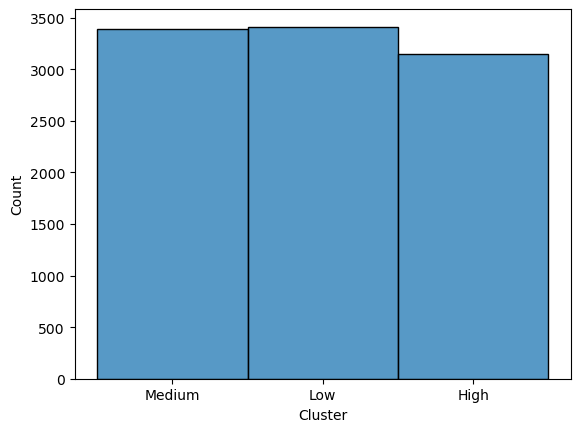

In [11]:
sns.histplot(dataset['Cluster'])

In [12]:
encoder = LabelEncoder()
scaler = StandardScaler()
onehot = OneHotEncoder()
minmaxscaler = MinMaxScaler()

In [13]:
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"])
dataset["Order Date"] = dataset["Order Date"].dt.month
dataset["Customer Name"] = encoder.fit_transform(dataset["Customer Name"])
dataset["Category"] = encoder.fit_transform(dataset["Category"])
dataset["City"] = encoder.fit_transform(dataset["City"])
dataset["Region"] = encoder.fit_transform(dataset["Region"])
dataset["State"] = encoder.fit_transform(dataset["State"])
dataset["Sub Category"] = encoder.fit_transform(dataset["Sub Category"])

In [14]:
dataset[["Sales", "Discount", "profit_margin","Order Date"]] = scaler.fit_transform(dataset[["Sales", "Discount", "profit_margin","Order Date"]])
dataset["Profit"] = minmaxscaler.fit_transform(dataset["Profit"].values.reshape(-1, 1))

In [15]:
class_to_numeric = {'Low': 0, 'Medium': 1, 'High': 2}
dataset['Cluster'] = [class_to_numeric[label] for label in dataset['Cluster']]

In [16]:
dataset.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,12,5,14,21,0.971837,2,-0.414559,-1.430908,0.369225,0,0.595874,1
1,37,1,13,8,0.971837,3,-1.291968,-0.627370,0.122296,0,-0.416872,1
2,14,3,0,13,-0.550301,4,1.507054,-0.225601,0.137417,0,-1.514014,0
3,15,4,12,4,0.667410,3,-1.036563,0.310092,0.063185,0,-1.260827,0
4,28,3,18,12,0.667410,3,1.498367,0.444015,0.877036,0,1.186643,2


# **Split Data and Encoder**

In [17]:
X = dataset.drop(['Cluster','Sub Category','State','Profit','Sales','Discount','profit_margin'],axis=1)
y = dataset['Profit']

In [18]:
X.head()


,Customer Name,Category,City,Order Date,Region
0,12,5,21,0.971837,2
1,37,1,8,0.971837,3
2,14,3,13,-0.550301,4
3,15,4,4,0.667410,3
4,28,3,12,0.667410,3


In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<AxesSubplot:>

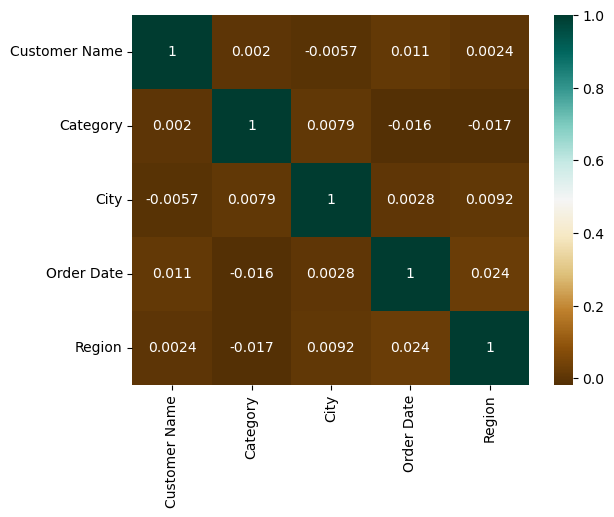

In [20]:
heatcol = X.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

In [21]:
print("Dimension of Train set",X_train.shape)
print("Dimension of Val set",X_val.shape)
print("Dimension of Test set",X_test.shape,"\n")

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Dimension of Train set (7960, 5)
Dimension of Val set (995, 5)
Dimension of Test set (996, 5) 

Number of numeric features: 5


# **LSTMr**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [23]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {loss}')

Epoch 1/100


c:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


249/249 [==============================] - 3s 5ms/step - loss: 4.0565e-08 - accuracy: 1.2563e-04 - val_loss: 4.1220e-08 - val_accuracy: 0.0000e+00


c:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


Epoch 2/100
249/249 [==============================] - 1s 4ms/step - loss: 4.0565e-08 - accuracy: 1.2563e-04 - val_loss: 4.1220e-08 - val_accuracy: 0.0000e+00
Epoch 3/100
249/249 [==============================] - 1s 4ms/step - loss: 4.0565e-08 - accuracy: 1.2563e-04 - val_loss: 4.1220e-08 - val_accuracy: 0.0000e+00
Epoch 4/100
249/249 [==============================] - 1s 4ms/step - loss: 4.0565e-08 - accuracy: 1.2563e-04 - val_loss: 4.1220e-08 - val_accuracy: 0.0000e+00
Epoch 5/100
249/249 [==============================] - 1s 4ms/step - loss: 4.0565e-08 - accuracy: 1.2563e-04 - val_loss: 4.1220e-08 - val_accuracy: 0.0000e+00
Epoch 6/100
249/249 [==============================] - 1s 4ms/step - loss: 4.0565e-08 - accuracy: 1.2563e-04 - val_loss: 4.1220e-08 - val_accuracy: 0.0000e+00
Epoch 7/100
249/249 [==============================] - 1s 4ms/step - loss: 4.0565e-08 - accuracy: 1.2563e-04 - val_loss: 4.1220e-08 - val_accuracy: 0.0000e+00
Epoch 8/100
249/249 [=========================

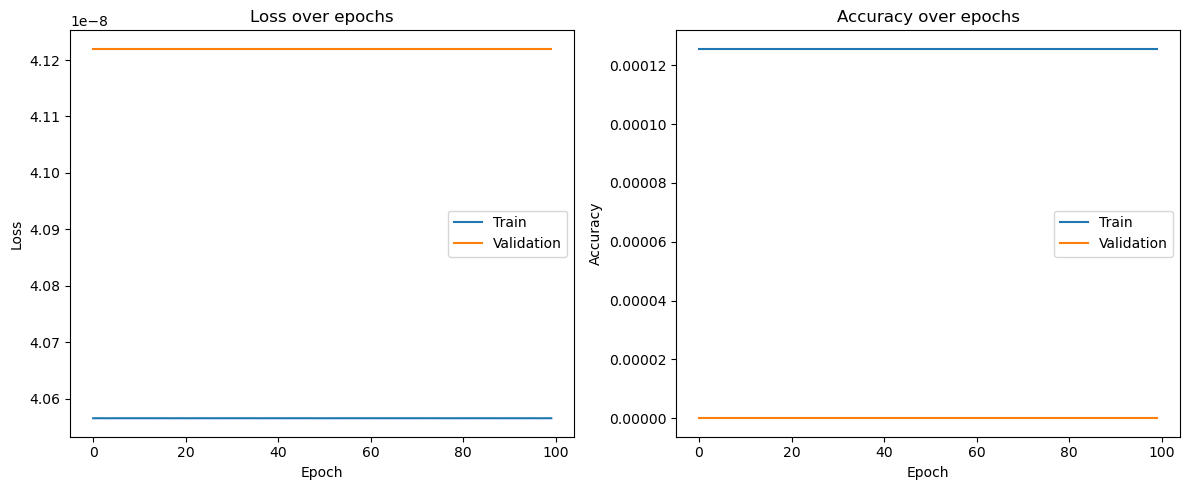

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.tight_layout()
plt.show()


In [26]:
y_test = y_test.values.reshape(-1, 1)

In [27]:
predictions_scaled = model.predict(X_test)
y_pred = minmaxscaler.inverse_transform(predictions_scaled)
y_test = minmaxscaler.inverse_transform(y_test)

32/32 [==============================] - 0s 2ms/step


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Evaluate the model
# Hitung Mean Squared Error (MSE) dan Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 70944.0245184296
Mean Absolute Error: 205.39032963304632


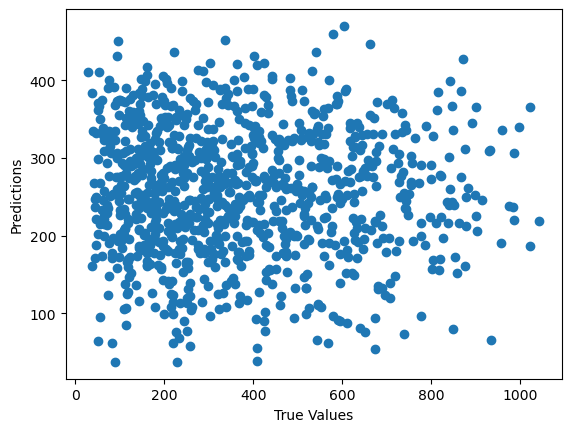

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

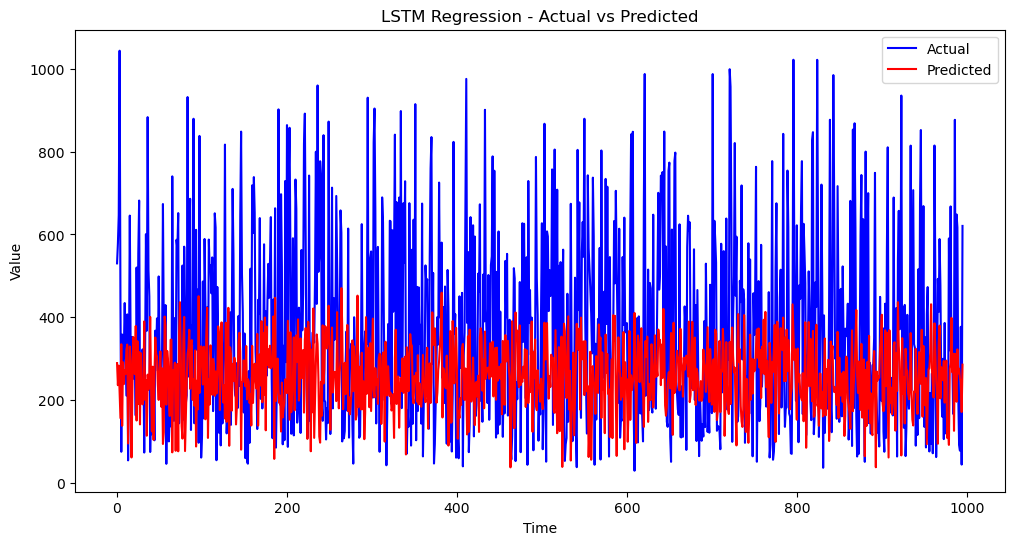

In [30]:
# Visualisasi
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_test, label='Actual', color='blue')

# Plot prediksi
plt.plot(y_pred, label='Predicted', color='red')

plt.title('LSTM Regression - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [31]:
# Ambang batas untuk mengubah nilai prediksi menjadi label kelas
threshold = 0.5
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

# Hitung akurasi
accuracy = np.sum(y_pred_class == y_test_class) / len(y_test_class)
print(f'accuracy : {accuracy}')

accuracy : 1.0


In [32]:
def compare_predictions(y_test, y_pred, max_percent_difference=80):
    accuracy = 0
    for index,value in enumerate(y_test) :
        total = np.abs(y_pred[index] / value) * 100
        print(total)
        # print(value)
    return accuracy

# Example usage
y_test = np.array([[539833.8872], [588749.0801], [658623.5624], [1062940.2724], [446097.59]])
y_pred = np.array([[930.04663], [609.46173], [1108.2301], [422.56683], [327.5707]])

accuracy = compare_predictions(y_test, y_pred)
# print("Accuracy:", accuracy)


[0.17228385]
[0.10351808]
[0.16826457]
[0.03975452]
[0.07343028]
